In [196]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats

# Ques 1

In [197]:
def linear_regression(X,Y, sig):
    chi2 = 0
    S = 0
    Sx = 0
    Sy = 0
    Sxx = 0
    Sxy = 0
    Syy = 0
    Y1 = [0 for i in range(len(X))]
    
    for i in range(len(X)):
        
        S = S + 1/(sig[i]**2)
        Sx = Sx + X[i]/(sig[i]**2)
        Sy = Sy + Y[i]/(sig[i]**2)
        Sxx = Sxx + (X[i]**2)/(sig[i]**2)
        Sxy = Sxy + (X[i]*Y[i])/(sig[i]**2)
        
    delta = S*Sxx - (Sx**2)
    a = (Sxx*Sy - Sx*Sxy)/delta
    b = (S*Sxy - Sx*Sy)/delta
        
    covab = -Sx/delta
    sig2_a = Sxx/delta
    err_a = math.sqrt(sig2_a)
    sig2_b = S/delta
    err_b = math.sqrt(sig2_b)
    for i in range(len(X)):
        Y1[i] = a + b * X[i]
        chi2 = chi2 + ((Y[i] - Y1[i])/sig[i])**2
        
    return a,b, covab, err_a, err_b

def readfile(filename,start):
    with open(filename,"r+") as f:
        lines = f.readlines()
        A=[]
        for i in range(start,len(lines)):
            A.append([float(j) for j in lines[i].split()])
        del lines
        return A

In [198]:

# Read data from file
data = pd.read_csv('esemfit.txt', sep='\s+', header=None)
time = data.iloc[:, 0]
counts = data.iloc[:, 1]
sigma = data.iloc[:, 2]

# Calculating log
ln_counts = np.log(counts)
sigma_ln_counts = 1 / np.sqrt(counts)

In [186]:

a,t, covab, err_a, err_b=linear_regression(time, ln_counts , sigma_ln_counts)
print(a,t, covab, err_a, err_b)

4.728994510251189 -0.009087764739079995 -5.222243727605437e-05 0.06484300759573301 0.0010104864480200628


In [187]:
lifetime = -1/t
print('the lifetime of the radioactive material was',lifetime)
error = lifetime * np.sqrt(np.sum(sigma_ln_counts ** 2) / (len(time) - 2))
print('The error in the lifetime was',error)

the lifetime of the radioactive material was 110.0380598212136
The error in the lifetime was 17.042096605166556


The fit is acceptable at the 5% level of significance.


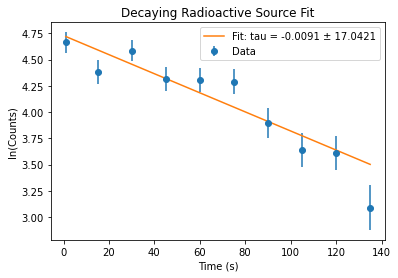

Lifetime: 110.0381 ± 17.0421 s


In [188]:
# Check if the fit is acceptable at the 5% level of significance
alpha = 0.05
df = len(time) - 2 
critical = scipy.stats.chi2.ppf(1 - alpha, df)

# Calculate reduced χ²
reduced_chi_square = (np.sum(((ln_counts - a - t * time) / sigma_ln_counts) ** 2) / (len(time) - 2))

if reduced_chi_square < critical:
    print(f'The fit is acceptable at the 5% level of significance.')
else:
    print(f'The fit is NOT acceptable at the 5% level of significance.')
    
# Plot data and fit
plt.errorbar(time, ln_counts, yerr=sigma_ln_counts, fmt='o', label='Data')
plt.plot(time, a + t * time, label=f'Fit: tau = {t:.4f} ± {error:.4f}')
plt.xlabel('Time (s)')
plt.ylabel('ln(Counts)')
plt.title('Decaying Radioactive Source Fit')
plt.legend()
plt.show()

# Print results
print(f'Lifetime: {lifetime:.4f} ± {error:.4f} s')

# Ques 2 :

In [189]:
import numpy as np

# Constants
p = 5.95
R = 0.0821
a = 6.254
b = 0.05422
T = 300

# Fixed point function for V
def f(V):
    return b + R*T/(p + a/(V**2))

V = 1.0 # Initial guess for V
e = 1e-5#Tolerance
i = 1000#iterations

#Fixed point iterations
for i in range(i):
    Vn = f(V)
    diff = np.abs(Vn - V)
    if diff < e:
        break
    V = Vn

# Print the result
print("V = {:.5f} L".format(V))
print("Number of iterations: {}".format(i+1))

V = 3.92995 L
Number of iterations: 9


In [190]:
#for another fixed point equation

P = 5.95
R = 0.0821
a = 6.254
b = 0.05422
T = 300

def f(V):
    return np.sqrt(a*(V-b)/R*T-P*(V-b))

V = 1.0 # Initial guess for V
e = 1e-5
i = 1000

#Fixed point iterations
for i in range(i):
    Vn = f(V)
    diff = np.abs(Vn - V)
    if diff < e:
        break
    V = Vn

# Print the result
print("V = {:.5f} L".format(V))
print("Number of iterations: {}".format(i+1))


V = 22846.61452 L
Number of iterations: 35


Here, we can see that for different fixed point equations , we get different solutions for different fixed point equations, it is because we calculate from a fixed point, and take difference as we iterate, for different curves, that might be different.

# Ques 5:

In [191]:
Q=np.array(readfile("matrix5.txt",0))
print(Q)

def power_method(A, num: int):
    n = A.shape[0]
    v = np.random.rand(n)
    for _ in range(num):
        Av = np.dot(A, v)
        v = Av / np.linalg.norm(Av)
    eigenvalue = np.dot(v, np.dot(A, v)) / np.dot(v, v)
    eigenvector = v

    return eigenvalue, eigenvector

[[ 2. -1.  0.  0.  0.]
 [-1.  2. -1.  0.  0.]
 [ 0. -1.  2. -1.  0.]
 [ 0.  0. -1.  2. -1.]
 [ 0.  0.  0. -1.  2.]]


In [192]:

eigen = []
eigenvec = []
temp= Q
for _ in range(2):
    eigenvalue, eigenvector = power_method(temp_matrix, 10000)
    eigen.append(eigenvalue)
    eigenvec.append(eigenvector)

    temp = temp- eigenvalue * np.outer(eigenvector, eigenvector)

print("Calculated via the power method")
for i in range(2):
    print(f"Eigenvalue {i+1}: {calculated_eigenvalues[i]}")
    print(f"Eigenvector {i+1}: {calculated_eigenvectors[i]}")
    print()



Calculated via the power method
Eigenvalue 1: 3.7320508075688776
Eigenvector 1: [-0.28867513  0.5        -0.57735027  0.5        -0.28867513]

Eigenvalue 2: 3.0
Eigenvector 2: [-5.00000000e-01  5.00000000e-01  1.38777878e-17 -5.00000000e-01
  5.00000000e-01]



In [193]:
# Verify if they match λk = b + 2√ac cos(kπ/n + 1) and vi_k = 2(√c/a)^k sin(ikπ/n + 1)

a = c = -1
b = 2
n = 5
print('Theoritical values')
expected_eigenvalues = [b + 2 * np.sqrt(a * c) * np.cos(k * np.pi / (n + 1)) for k in range(1, 6)]
expected_eigenvectors = [[2 * (np.sqrt(c / a))**k * np.sin(i * k * np.pi / (n + 1)) for i in range(1, n + 1)] for k in range(1, 6)]

expected_eigenvectors = np.array(expected_eigenvectors)
expected_eigenvectors = expected_eigenvectors / np.linalg.norm(expected_eigenvectors, axis=1)[:, np.newaxis]

for i in range(2):
    print( expected_eigenvalues[i])

    print( expected_eigenvectors[i])

Theoritical values
3.7320508075688776
[0.28867513 0.5        0.57735027 0.5        0.28867513]
3.0
[ 5.00000000e-01  5.00000000e-01  7.07050159e-17 -5.00000000e-01
 -5.00000000e-01]


The eigen values are matching with theoritical values, whereas, the eigenvectors are differing , because the covergence of eigenvectors is not accurate in power method, since a small error can propogate , and cause large changes in eigenvectors.

# Ques 6

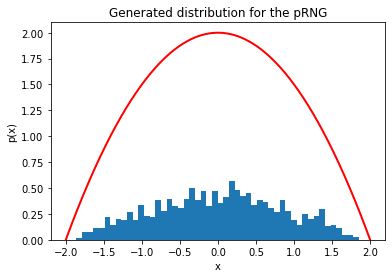

Success probability: 0.9190


In [213]:
#Using accept/reject method to generate pseudo random numbers.
#given  in the question
a = 2
n = 1000

# Generating the Gaussian distributed samples
gauss = np.random.normal(0, 1, num_samples)

samples = [] #accepted samples
for x in gauss:
    if np.abs(x) < a and np.random.uniform(0, 1) < 0.5 * (a**2 - x**2):
        samples.append(x)

# Plotting the generated distribution
plt.hist(samples, bins=50, density=True)
x = np.linspace(-a, a, 1000)
y = 0.5 * (a**2 - x**2)
plt.plot(x, y, 'r', linewidth=2)
plt.title('Generated distribution for the pRNG')
plt.xlabel('x')
plt.ylabel('p(x)')
plt.show()

# Calculating success probability
success_probability = len(samples) / n
print(f'Success probability: {success_probability:.4f}')

Success probability calculated as the ratio as the no. of accepted samples to the total no. of samples generated, we get succes probability of 0.91 and around that, which means 91 percent is getting accepted

# Ques 7

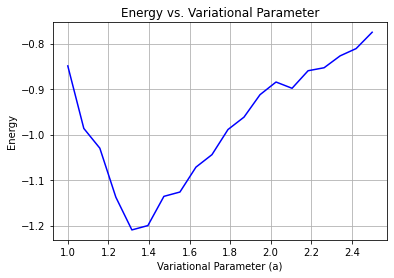

Minimum Energy: -1.2094517995467589
Optimal Variational Parameter (a): 1.3157894736842106


In [215]:
#Define trial function
def wf(x,alpha):#trial wavefunction
    return 0.5*(alpha**2-x**2)


#define prob density
def prob_density(x,alpha):
    if abs(x)<2:        #The given trial wave function
        return 0.25*(alpha**2-x**2)**2
    else: 
        return 0

#define E local
def E_local(x,alpha):#The local energy calculated in the text
    return (-2)/(alpha**2-x**2)-x**2/2

def metropolis(N, alpha):
    L = 3/np.sqrt(2*alpha) #The length of the well
    x = np.random.rand()*2*L-L #random number from -L to L
    E = 0
    E2 = 0
    Eln_average = 0
    ln_average = 0
    rejection_ratio = 0
    for i in range(N):
        x_trial = x + 0.4*(np.random.rand()*2*L-L)
        #x_trial = np.random.rand()*2*L-L
        if prob_density(x_trial,alpha) >= prob_density(x,alpha):
            x = x_trial
        else:
            dummy = np.random.rand()
            if dummy < prob_density(x_trial,alpha)/prob_density(x,alpha):
                x = x_trial
            else:
                rejection_ratio += 1/N
        E += E_local(x,alpha)/N
        E2 += E_local(x,alpha)**2/N
        Eln_average += (E_local(x, alpha)*-x**2)/N
        ln_average += -x**2/N

    return E, E2, Eln_average, ln_average


num_steps = 20000
num_a_values = 20
a_values = np.linspace(1, 2.5, num_a_values)

energies = []
for a in a_values:
    E, E2, Eln_average, ln_average = metropolis(num_steps, a)
    energies.append(E)

# Find the minimum energy and the corresponding optimal alpha value
min_energy = min(energies)
optimal_a = a_values[np.argmin(energies)]

# Plot the energy as a function of alpha
plt.plot(a_values, energies, color='b', linestyle='-')
plt.xlabel('Variational Parameter (a)')
plt.ylabel('Energy')
plt.title('Energy vs. Variational Parameter')
plt.grid(True)
plt.show()

print("Minimum Energy:", min_energy)
print("Optimal Variational Parameter (a):", optimal_a)